In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the dataset
df = pd.read_csv("D:/Data_h/stores_sales_data.csv")

In [9]:
# Display first few rows
#df.head(10)
#df.tail()
display(df.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [4]:
# Step 2: Data Cleaning
# Check for missing values
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [12]:
# Fill missing values
# Filling Item_Weight with median value
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [13]:
# Filling Outlet_Size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [15]:
# Check again
display(df.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

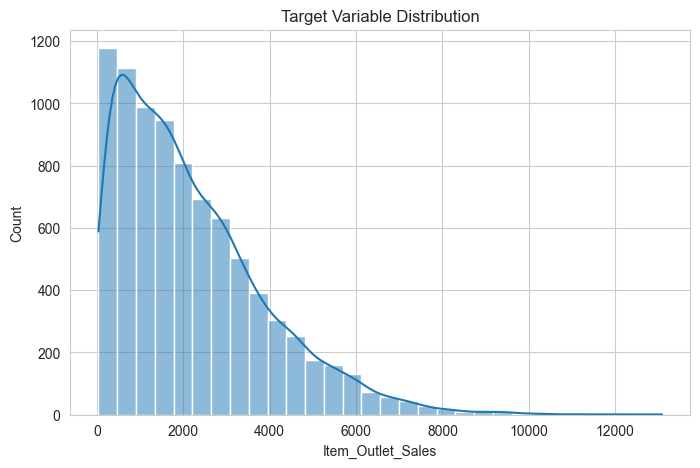

In [17]:
# Step 3: Exploratory Data Analysis
# Target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Target Variable Distribution")
plt.show()

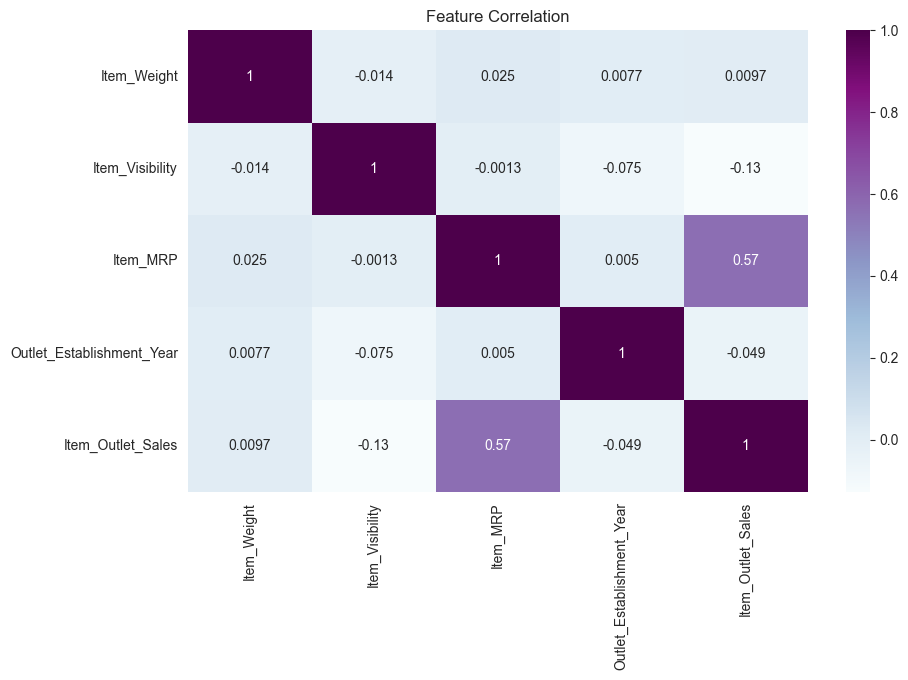

In [23]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='BuPu')
plt.title("Feature Correlation")
plt.show()

In [28]:
# Step 4: Feature Engineering
# Encoding Categorical Variables
le = LabelEncoder()
categorical_columns = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [29]:
# One-hot encoding for 'Item_Type'
df = pd.get_dummies(df, columns=['Item_Type'], drop_first=True)

KeyError: "None of [Index(['Item_Type'], dtype='object')] are in the [columns]"

In [30]:
# Scaling numerical features
scaler = StandardScaler()
df[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(df[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

In [32]:
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.831187,1,-0.970732,1.747454,9,1999,1,0,1,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.630810,2,-0.908111,-1.489023,3,2009,1,2,2,False,...,False,False,False,False,False,False,False,False,True,False
2,1.108727,1,-0.956917,0.010040,9,1999,1,0,1,False,...,False,False,False,False,True,False,False,False,False,False
3,1.510904,2,-1.281758,0.660050,0,1998,3,2,0,False,...,True,False,False,False,False,False,False,False,False,False
4,-0.918719,1,-1.281758,-1.399220,1,1987,0,2,1,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,1,-0.181193,1.180783,1,1987,0,2,1,False,...,False,False,False,False,False,False,False,True,False,False
8519,-1.048835,2,-0.371154,-0.527301,7,2002,3,1,1,False,...,False,False,False,False,False,False,False,False,False,False
8520,-0.523639,1,-0.599784,-0.897208,6,2004,2,1,1,False,...,False,False,True,False,False,False,False,False,False,False
8521,-1.325628,2,1.532880,-0.607977,3,2009,1,2,2,False,...,False,False,False,False,False,False,False,True,False,False


In [33]:
# Step 5: Data Splitting and Model Building

y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MAE: 763.8727773583578
MSE: 1192868.8783412464
R2 Score: 0.5611177278982666


In [41]:
# Step 6: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 40],
    'min_samples_split': [20, 10, 25]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Final Model with Best Params
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 25, 'n_estimators': 300}


In [42]:
# Evaluate Best Model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best}")
print(f"Best Model MSE: {mse_best}")
print(f"Best Model R2 Score: {r2_best}")

Best Model MAE: 735.0165132161079
Best Model MSE: 1112666.363449047
Best Model R2 Score: 0.5906259685802673
